Wine recognition datasets
There are 178 samples in the dataset. 3 classes for the wine classification thus I chose DecisionTreeClassifire to train and test the datasets. Datasets are prepared for the tests first, studied some features values, added some scatter plots for the visualization, as well as the tree classification. 

In [1]:
#Numerical array.
import numpy as np

#Data frames. 
import pandas as pd 

#plotting.
import matplotlib.pyplot as plt

#logistic regression.
import sklearn.linear_model as lm


#Fansier, statical plots.
import seaborn as sns

# Import CSV
import csv

In [2]:
#Standar plot size.
plt.rcParams['figure.figsize']=(15,10)

#Standard colour scheme.
plt.style.use('ggplot')

In [3]:
from sklearn.datasets import load_wine
dataset =load_wine()

In [4]:
dataset.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
dataset.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
x = dataset.data

In [7]:
t = dataset.target

In [8]:
x = dataset.data
t = dataset.target
columns = dataset.feature_names

In [9]:
columns_name = dataset.feature_names

In [10]:
# this is the all inclusive data on wine including class/target values 
data1 = pd.DataFrame(data= np.c_[dataset['data'], dataset['target']],
                     columns= dataset['feature_names'] + ['target'])

In [11]:
data1

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [12]:
data1.mean()

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
target                            0.938202
dtype: float64

In [13]:
type(x), x.shape


(numpy.ndarray, (178, 13))

In [14]:
x = dataset.data

In [15]:
t = dataset.target

In [16]:
np.unique(t)

array([0, 1, 2])

In [17]:
x.shape

(178, 13)

In [18]:
t.shape

(178,)

In [19]:
dataset.data = pd.DataFrame(x)

In [20]:
# Study some features values 
df_wine=dataset.data[[0,9,12]]
df_wine.columns = [u'class', u'color', u'proline']
pd.DataFrame(df_wine)  

,class,color,proline
0,14.23,5.64,1065.0
1,13.20,4.38,1050.0
2,13.16,5.68,1185.0
3,14.37,7.80,1480.0
4,13.24,4.32,735.0
...,...,...,...
173,13.71,7.70,740.0
174,13.40,7.30,750.0
175,13.27,10.20,835.0
176,13.17,9.30,840.0


Text(0, 0.5, 'target')

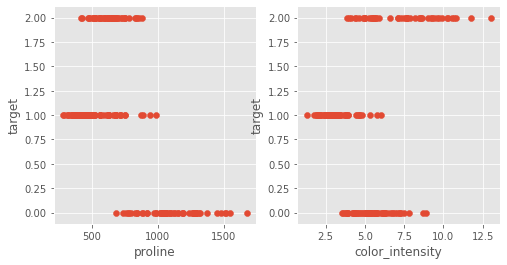

In [21]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(data1['proline'], data1['target'])
plt.xlabel('proline')
plt.ylabel('target')

plt.subplot(1,2,2)
plt.scatter(data1['color_intensity'], data1['target'])
plt.xlabel('color_intensity')
plt.ylabel('target')



Text(0, 0.5, 'target')

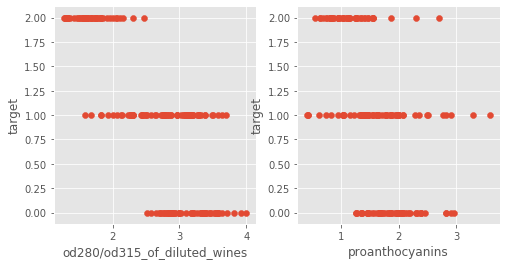

In [22]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(data1['od280/od315_of_diluted_wines'], data1['target'])
plt.xlabel('od280/od315_of_diluted_wines')
plt.ylabel('target')

plt.subplot(1,2,2)
plt.scatter(data1['proanthocyanins'], data1['target'])
plt.xlabel('proanthocyanins')
plt.ylabel('target')

Text(0, 0.5, 'target')

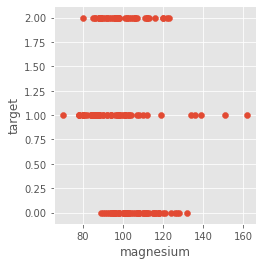

In [23]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(data1['magnesium'], data1['target'])
plt.xlabel('magnesium')
plt.ylabel('target')


Train and test the datasets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, t_train, t_test = train_test_split(x,t, test_size = 0.3, random_state = 0)

In [26]:
from sklearn.tree import DecisionTreeClassifier


In [27]:
model = DecisionTreeClassifier(random_state = 0)

In [28]:
model.fit(x_train, t_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [29]:
print(f'train score:{model.score(x_train, t_train)}')
print(f'test score:{model.score(x_test, t_test)}')


train score:1.0
test score:0.9444444444444444


In [30]:
model.predict(x_test)

array([0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 1, 0, 1, 1,
       1, 0, 2, 1, 2, 0, 2, 2, 0, 2])

In [31]:

pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [32]:
import graphviz

from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [33]:
dot_data = export_graphviz(model)

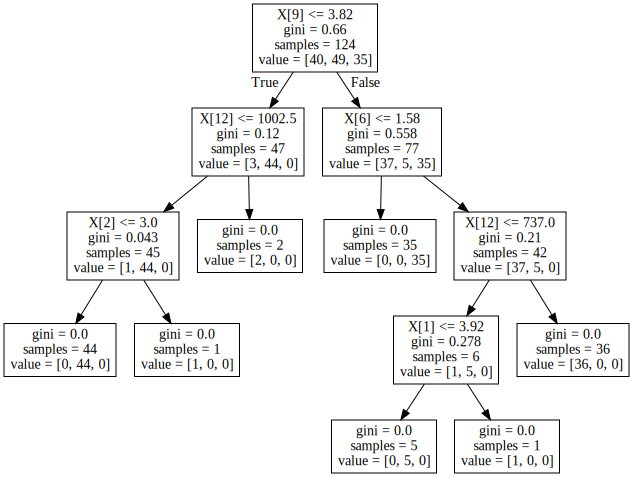

In [34]:
graph_tree = graphviz.Source(dot_data)
graph_tree

In [35]:
feature_importance = model.feature_importances_
feature_importance


array([0.        , 0.02036125, 0.02389053, 0.        , 0.        ,
       0.        , 0.4175378 , 0.        , 0.        , 0.40621672,
       0.        , 0.        , 0.1319937 ])

#### svm

In [36]:
from sklearn.svm import SVC
# import suppor vector classification 

In [37]:
# make model a instance 
model = SVC()

In [38]:
model.fit(x_train, t_train)

C:\Users\kiyok\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [39]:
print(f'train score:{model.score(x_train, t_train)}')
print(f'test score:{model.score(x_test, t_test)}')



train score:1.0
test score:0.4444444444444444


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()


In [42]:
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [43]:
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [44]:
round(x_train_std.mean())

0.0

In [45]:
round(x_train_std.std())

1.0

In [46]:
model_std = SVC(C = 8 , gamma = 0.01)
# inside the blackets are hyperparametor that needs to tweak 

In [47]:
model_std.fit(x_train_std, t_train)

SVC(C=8, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [48]:
print(f'train score:{model.score(x_train, t_train)}')
print(f'test score:{model.score(x_test, t_test)}')
print('==========================')
print(f'train score:{model_std.score(x_train_std, t_train)}')
print(f'test score:{model_std.score(x_test_std, t_test)}')



train score:1.0
test score:0.4444444444444444
train score:0.9919354838709677
test score:1.0
